In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
data = pd.read_csv('default.csv')
data = data.dropna()
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [3]:
X = data['balance']
Y = data['student']
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [4]:
catColumns = data.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()

for col in catColumns:
    n = len(data[col].unique())
    if (n > 2):
       X = pd.get_dummies(data[col])
       X = X.drop(X.columns[0], axis=1)
       data[X.columns] = X
       data.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
       le.fit(data[col])
       data[col] = le.transform(data[col])

In [5]:
model = LogisticRegression()
model.fit(np.reshape(X, newshape = (-1,1)), Y)
print("Coefficent =",model.coef_)
print("Constant(c) =",model.intercept_)

Coefficent = [[0.00114674]]
Constant(c) = [-1.83437903]


In [6]:
x_new = [[10000]]
y_pred = model.predict(x_new)
print("Balance:",x_new[0])
Class = {1:'Yes', 0 : 'No'}
print("Is He Student?:", Class[y_pred[0]])

Balance: [10000]
Is He Student?: Yes


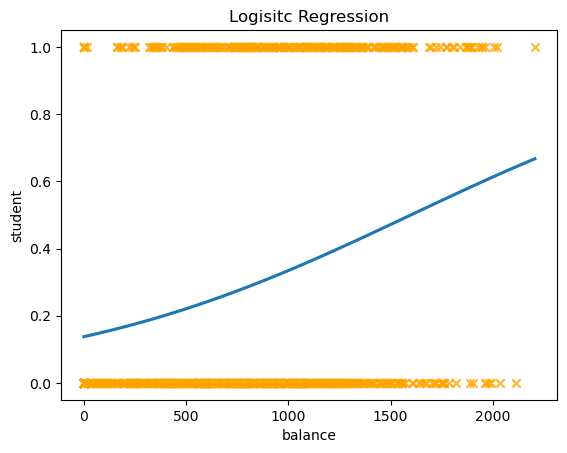

In [7]:
sns.regplot(x = X, y = Y, data = data, logistic = True, ci = None,
            marker = 'x', scatter_kws = {'color': 'orange'})
plt.title("Logisitc Regression")
plt.show()